In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1650 SUPER'

In [4]:
from environment import ImageBanditEnv, Experiment
from algorithms import LinUCB, CNN_UCB, ViT_UCB
from pathlib import Path

c:\Users\dtarcug\Desktop\ViT-Contextual-Bandits\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
f = "env2.pkl"
if Path(f).is_file():
    environment = ImageBanditEnv.load(f)
else:
    environment = ImageBanditEnv("data.jsonl", 3, 1)
    environment.save(f)
# f = "env3.pkl"
# if Path(f).is_file():
#     environment = ImageBanditEnv.load(f)
# else:
#     environment = ImageBanditEnv.from_mnist(Path("dataset"), 3)
#     environment.save(f)


In [6]:
linucb = LinUCB(environment)
# cnnucb = CNN_UCB(environment, alpha=2)
vitucb = ViT_UCB(environment, lora_r=20, alpha=4)
experiment = Experiment(environment, [vitucb, linucb ])

Some weights of ViTModel were not initialized from the model checkpoint at WinKawaks/vit-tiny-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
for i in environment.arms:
    print(i.mu)
    print(i.sigma)

5.532014278429373
1
6.508597654258032
1
7.408556858745538
1


In [8]:
# print(cnnucb.numel)
print(vitucb.numel)
for i in vitucb.vit.parameters():
    print(i.shape, i.requires_grad)

24041
torch.Size([1, 1, 192]) False
torch.Size([1, 197, 192]) False
torch.Size([192, 3, 16, 16]) False
torch.Size([192]) False
torch.Size([192, 192]) False
torch.Size([192]) False
torch.Size([20, 192]) True
torch.Size([192, 20]) True
torch.Size([192, 192]) False
torch.Size([192]) False
torch.Size([20, 192]) True
torch.Size([192, 20]) True
torch.Size([192, 192]) False
torch.Size([192]) False
torch.Size([20, 192]) True
torch.Size([192, 20]) True
torch.Size([192, 192]) False
torch.Size([192]) False
torch.Size([768, 192]) False
torch.Size([768]) False
torch.Size([192, 768]) False
torch.Size([192]) False
torch.Size([192]) False
torch.Size([192]) False
torch.Size([192]) False
torch.Size([192]) False
torch.Size([192, 192]) False
torch.Size([192]) False
torch.Size([20, 192]) True
torch.Size([192, 20]) True
torch.Size([192, 192]) False
torch.Size([192]) False
torch.Size([20, 192]) True
torch.Size([192, 20]) True
torch.Size([192, 192]) False
torch.Size([192]) False
torch.Size([20, 192]) True
tor

In [9]:
experiment.run(100)

Running vit_ucb:   0%|          | 0/100 [00:00<?, ?it/s]c:\Users\dtarcug\Desktop\ViT-Contextual-Bandits\.venv\Lib\site-packages\torch\autograd\graph.py:841: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\cuda\CublasHandlePool.cpp:270.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Running linucb: 100%|██████████| 100/100 [00:16<00:00,  6.23it/s]


In [10]:
experiment.generate_results()

In [34]:
[i.mu for i in environment.arms]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[6.85353327 6.03126192 6.73521996]
[6.17355211 6.64383237 7.14018122]


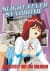

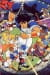

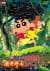

In [82]:
contexts = environment.get_contexts()
print(vitucb._batch_preds(contexts))
print(linucb.predict(contexts))
for i in contexts:
    display(i)

In [57]:
print(vitucb.bonus_graph[-3:])
print(linucb.bonus_graph[-3:])
print(vitucb.history[-10:])

[array([0.89436718, 0.79753793, 0.73318266]), array([0.7028647 , 0.9501945 , 1.00223579]), array([0.84538117, 0.83101452, 0.75920171])]
[array([0.98164561, 0.81382465, 0.25223253]), array([0.73173463, 0.79372479, 0.29323563]), array([0.67598347, 0.53402412, 0.32476965])]
[(1, 7.32254200891785), (0, 5.154128654627457), (2, 8.989279787097338), (1, 7.497143208777249), (2, 7.643246674141775), (2, 7.3009628472960575), (0, 5.564111386158076), (1, 6.72750968989695), (2, 8.281635598040316), (1, 5.047838580999585)]


In [27]:
vitucb.replay.buffer['reward']

deque([8.114396970636646,
       7.407056475152951,
       4.610495458660482,
       6.487437381233974,
       7.393610785877609,
       5.162092998054181,
       4.324159509842594,
       7.980142927663583,
       7.559326751543069,
       6.386652502468658],
      maxlen=10)

deque([0], maxlen=3)
deque([0, 1], maxlen=3)
deque([0, 1, 2], maxlen=3)
deque([1, 2, 3], maxlen=3)
deque([2, 3, 4], maxlen=3)
deque([3, 4, 5], maxlen=3)
deque([4, 5, 6], maxlen=3)
deque([5, 6, 7], maxlen=3)
deque([6, 7, 8], maxlen=3)
deque([7, 8, 9], maxlen=3)
